# Problem Statement
 - Using the data from the Ames, Iowa housing dataset: We have been tasked with creating a regression model to accurately predict housing prices

### Contents
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
  - [Feature Engineering Part 1: Dawn of the Feature Engineering](#Feature-Engineering-Part-1:-Dawn-of-the-Feature-Engineering) 
- [EDA and Visualization](#EDA-and-Visualization)
- [Model Creation: Attempt 1](#Model-Creation:-Attempt-1)
- [Feature Engineering Part 2: Electric Boogaloo](#Feature-Engineering-Part-2:-Electric-Boogaloo)
- [Model Attempt 2](#Model-Attempt-2)
- [Conclusions](#Conclusions)
- [Prepping Dataframes for Extraction/Analysis](#Prepping-Dataframes-for-Extraction/Analysis)

In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

%matplotlib inline

# Data Import and Cleaning

In [2]:
#Changing Pandas Settings so that I can easily display all my columns and rows.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
test_csv = './datasets/test.csv'
train_csv = './datasets/train.csv'
sample_reg_csv = './datasets/sample_sub_reg.csv'

In [4]:
test = pd.read_csv(test_csv)
df = pd.read_csv(train_csv)
sample_reg = pd.read_csv(sample_reg_csv)
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
#The .head() is at the end just to keep this notebook from being too cluttered
test.isnull().sum().head()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
dtype: int64

In [6]:
#'Alley', 'Pool QC', 'Fence', and 'Misc Feature' are all missing a a majority of their data. I think they need to
#be dropped or they will impact my model negatively.
df.isnull().sum().head()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
dtype: int64

In [7]:
test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,879.000000,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,834.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,443.397042,53.835040,539.518771,1036.750853,1148.053470,349.751991,2.725825,1500.531286,0.440273,0.055745,1.541524,0.399317,2.879408,1.047782,6.459613,0.618885,1976.796163,1.744027,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,442.480223,178.539854,426.082726,419.258428,381.022337,434.595133,32.554124,517.413260,0.529983,0.229560,0.560908,0.506045,0.830249,0.223844,1.603071,0.669313,25.695683,0.751162,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,790.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,374.000000,0.000000,453.000000,975.000000,1064.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,735.500000,0.000000,781.500000,1248.000000,1358.000000,720.000000,0.000000,1781.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,3138.000000,3138.000000,2065.000000,481.000000,4676.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [8]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [9]:
test.shape

(879, 80)

In [10]:
df.shape

(2051, 81)

In [11]:
#Alright time for some cleaning. First lets lowercase all of our columns and get rid of spaces.
test.columns = test.columns.str.lower().str.replace(' ', '_') #First our test set
df.columns = df.columns.str.lower().str.replace(' ', '_') #Now our train set

df.columns
test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond', 'paved_drive',
       '

In [12]:
#Once again-- calling .head() here just to keep the notebook clean.
test.dtypes.head()
df.dtypes.head()

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
dtype: object

In [13]:
#In our initial dataset these are the columns I could use in a regression model unless I do some 
#feature engineering
df._get_numeric_data().columns

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice'], dtype='object')

In [14]:
# Out of these columns, there are some that we... probably shouldn't be using in our model.
# If we're trying to predict saleprice, I doubt 'ms_sub_class' (I looked this one up in the data dictionary)
# mo_sold' and 'yr_sold' won't do anything other than make our model worse. Let's deal with them.
df['ms_subclass'] = df['ms_subclass'].astype(str)
test['ms_subclass'] = test['ms_subclass'].astype(str)
df['mo_sold'] = df['mo_sold'].astype(str)
test['mo_sold'] = test['mo_sold'].astype(str)
df['yr_sold'] = df['yr_sold'].astype(str)
test['yr_sold'] = test['yr_sold'].astype(str)

In [15]:
#36 Columns in total
len(df._get_numeric_data().columns)

36

In [16]:
#I would love to binarize some of these "object" categorical variables, let's take a look at our
#dataframes and see if there are any that can be easily converted.
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [17]:
features_to_drop = ['alley', 'pool_qc', 'fence', 'misc_feature']

In [18]:
#First things first, lets drop the columns where the majority of the data is missing.
df.drop(features_to_drop, axis = 1, inplace = True)
test.drop(features_to_drop, axis = 1, inplace = True)

In [19]:
df['lot_shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: lot_shape, dtype: int64

In [20]:
df['land_contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: land_contour, dtype: int64

In [21]:
df['exter_qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64

In [22]:
df['exter_cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: exter_cond, dtype: int64

In [23]:
df['foundation'].value_counts()

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: foundation, dtype: int64

In [24]:
df['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [25]:
df['heating_qc'].value_counts()

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64

In [26]:
df['central_air'].value_counts()

Y    1910
N     141
Name: central_air, dtype: int64

In [27]:
df['kitchen_qual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: kitchen_qual, dtype: int64

In [28]:
#Here's a quick lambda function operation to binarize our central air column
df['central_air'] = df['central_air'].map(lambda binarize: 1 if binarize == 'Y' else 0)
test['central_air'] = test['central_air'].map(lambda binarize: 1 if binarize == 'Y' else 0)

In [29]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [30]:
#I think I could use a .replace() to change most of my 'Qual' values with numbers in one go, let's try that.
df.replace({
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Av' : 3,
    'Fa' : 2,
    'Mn' : 2,
    'Po' : 1,
    'No' : 1,
    'NA' : 0,
}, inplace= True)

test.replace({
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Av' : 3,
    'Fa' : 2,
    'Mn' : 2,
    'Po' : 1,
    'No' : 1,
    'NA' : 0,
}, inplace= True)



In [31]:
#The data dictionary says that 'functional' means 'Home functionality rating'. This sounds like it could have a
#large impact on house price if I understand it correctly.
df['functional'].value_counts()

df.replace({
    'Typ' : 7,
    'Min1' : 6,
    'Min2' : 5,
    'Mod' : 4,
    'Maj1' : 3,
    'Maj2' : 2,
    'Sev' : 1,
    'Sal' : 0
}, inplace = True)

test.replace({
    'Typ' : 7,
    'Min1' : 6,
    'Min2' : 5,
    'Mod' : 4,
    'Maj1' : 3,
    'Maj2' : 2,
    'Sev' : 1,
    'Sal' : 0
}, inplace = True)

In [32]:
df.isnull().sum().head()

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage    330
dtype: int64

In [33]:
categoricals = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 
                'fireplace_qu', 'garage_qual', 'garage_cond',
                'bsmt_half_bath', 'bsmt_full_bath']

In [34]:
#I'm going to replace my categorical NaNs with 0s
df[categoricals] = df[categoricals].fillna(0)
test[categoricals] = test[categoricals].fillna(0)

In [35]:
#David gave me this idea when I was talking to him about project 2. Rather then fill my lot frontage with medians of
#the entire column, I can instead take the 'neighborhood' into account for some of these and grab the neighborhood.
#average instead of doing my spray and pray NaN method. I could try this for some other data columns but
#'lot_frontage' was definitely one of my worst NaN numerical offenders.
#This code is inspired by stackoverflow code that helped me figure out how to get the mean of a specific value
#in a column and then properly apply it.
def neighbaverage(dataframe, value_column):
    dataframe[value_column] = dataframe.groupby('neighborhood').transform(lambda x: x.fillna(x.mean()))[value_column] 



In [36]:
#Look at these NaNs! Let's see if this function works
df[['lot_frontage']].head()
test[['lot_frontage']].head()

,lot_frontage
0,69.0
1,NaN
2,58.0
3,60.0
4,NaN


In [37]:
neighbaverage(df, 'lot_frontage')
neighbaverage(test, 'lot_frontage')

In [38]:
df[['lot_frontage']].head()
test[['lot_frontage']].head()

,lot_frontage
0,69.000000
1,79.222222
2,58.000000
3,60.000000
4,75.254545


In [39]:
#There are 3 NaN values left in my df['lot_frontage'] column but my fill NaN function further along in this notebook
#will fill them with column medians.
df.isnull().sum()
test.isnull().sum().head()

id              0
pid             0
ms_subclass     0
ms_zoning       0
lot_frontage    0
dtype: int64

In [40]:
#Still need to do something about the rest of my numerical NaNs. I'm going to initially try using .fillna() 
#and replacing all NaNs with 0s. I'm worried this might not be the best solution though, so I may revisit this.
#On second thought, I took a look at this medium article
#[https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b]
#And I think I'll be trying to replace NaNs with median values in my numerical columns.
#This article linked a slideshow by Matt, which I found pretty funny.
def fill_na_median(x):   #Defining a function to expedite this process
    median = x.median()
    return x.fillna(median, inplace = True)

In [41]:
#I'm also going to try .mean() on my NaNs to see if that makes my predictions better. 
#NOTE: Mean didn't work as well as I'd had hoped it to but I've kept this in here to show my work and due diligence.
def fill_na_mean(x):
    mean = x.mean()
    return x.fillna(mean, inplace = True)

In [42]:
fill_na_median(df['lot_frontage'])
fill_na_median(df['mas_vnr_area'])
fill_na_median(df['garage_yr_blt'])
fill_na_median(df['total_bsmt_sf'])
fill_na_median(df['bsmtfin_sf_1'])
fill_na_median(df['bsmtfin_sf_2'])
fill_na_median(df['bsmt_unf_sf'])
fill_na_median(df['garage_cars'])
fill_na_median(df['garage_area'])
fill_na_median(test['lot_frontage'])
fill_na_median(test['mas_vnr_area'])
fill_na_median(test['garage_yr_blt'])
fill_na_median(test['total_bsmt_sf'])
fill_na_median(test['bsmtfin_sf_1'])
fill_na_median(test['bsmtfin_sf_2'])
fill_na_median(test['bsmt_unf_sf'])
fill_na_median(test['garage_cars'])
fill_na_median(test['garage_area'])

In [43]:
# fill_na_mean(df['lot_frontage'])
# fill_na_mean(df['mas_vnr_area'])
# fill_na_mean(df['garage_yr_blt'])
# fill_na_mean(df['total_bsmt_sf'])
# fill_na_mean(df['bsmtfin_sf_1'])
# fill_na_mean(df['bsmtfin_sf_2'])
# fill_na_mean(df['bsmt_unf_sf'])
# fill_na_mean(df['garage_cars'])
# fill_na_mean(df['garage_area'])
# fill_na_mean(test['lot_frontage'])
# fill_na_mean(test['mas_vnr_area'])
# fill_na_mean(test['garage_yr_blt'])
# fill_na_mean(test['total_bsmt_sf'])
# fill_na_mean(test['bsmtfin_sf_1'])
# fill_na_mean(test['bsmtfin_sf_2'])
# fill_na_mean(test['bsmt_unf_sf'])
# fill_na_mean(test['garage_cars'])
# fill_na_mean(test['garage_area'])

In [44]:
df.isnull().sum().head()
test.isnull().sum().head()

id              0
pid             0
ms_subclass     0
ms_zoning       0
lot_frontage    0
dtype: int64

In [45]:
df.dtypes.head()

id                int64
pid               int64
ms_subclass      object
ms_zoning        object
lot_frontage    float64
dtype: object

In [46]:
#Looks like some of my dtypes are still incorrect after changing their values to nums. Let's fix them.
incorrect_dtypes = ['exter_qual', 'exter_cond', 'kitchen_qual']

In [47]:
df[incorrect_dtypes] = df[incorrect_dtypes].astype('int')

In [48]:
df.dtypes.head()

id                int64
pid               int64
ms_subclass      object
ms_zoning        object
lot_frontage    float64
dtype: object

In [49]:
#Let's save the cleaned DF to its own file
df.to_csv('./datasets/cleanedDF.csv', index = False)

## Feature Engineering Part 1: Dawn of the Feature Engineering

In [50]:
#I did some brief research on what determines 
#a house's value [https://www.tax.ny.gov/pubs_and_bulls/orpts/mv_estimates.htm]
#Before I create my first model I want to make some dummy variables of categorigal variables that I think will
#particularly impact price. From that research, I think it would be prudent to binarize
#my 'neighborhood'(I'm 99% sure neighborhood impacts price) 
#column and my 'lot config'(lot config could equate with "Curb Appeal") column
#Garage type could also be an impactful variable, but I think that the 'garage_area' column will 
#make that column redundant and break one of the LINEI rules

df = pd.get_dummies(df, columns = ['neighborhood', 'lot_config'], drop_first = True)
test = pd.get_dummies(test, columns = ['neighborhood', 'lot_config'], drop_first = True)
# df = pd.get_dummies(df, columns = ['neighborhood'], drop_first = True)
# test = pd.get_dummies(test, columns = ['neighborhood'], drop_first = True)

In [51]:
#I started to get some errors down the line... I didn't catch this initially but my column counts in my df and test
#are different. I need to fix this.
df.shape

(2051, 106)

In [52]:
test.shape

(879, 103)

In [53]:
def fixcolumns(correct_column_var, incorrect_column_var): #defining a function so I can easily fix this next time
    for column in correct_column_var.columns:
        if column not in incorrect_column_var.columns:
            print(f"{column} was missing")
            

In [54]:
fixcolumns(df, test)

saleprice was missing
neighborhood_GrnHill was missing
neighborhood_Landmrk was missing


In [55]:
test['neighborhood_GrnHill'] = 0
test['neighborhood_Landmrk'] = 0

In [56]:
test.shape

(879, 105)

In [57]:
df.shape

(2051, 106)

In [58]:
#Uh oh. These numbers should only be one off from each other.
len(df._get_numeric_data().columns)

79

In [59]:
len(test._get_numeric_data().columns)

73

In [60]:
def numericcolumns(correct_column_var, incorrect_column_var): #defining a function so I can easily fix this next time
    for column in correct_column_var._get_numeric_data().columns:
        if column not in incorrect_column_var._get_numeric_data().columns:
            print(f"{column} was missing")

In [61]:
numericcolumns(df, test)

exter_qual was missing
exter_cond was missing
heating_qc was missing
kitchen_qual was missing
functional was missing
saleprice was missing


In [62]:
wrong_dtypes = ['exter_qual', 'exter_cond', 'heating_qc', 'kitchen_qual', 'functional']

In [63]:
test[wrong_dtypes] = test[wrong_dtypes].astype('int')

In [64]:
numericcolumns(df, test)

saleprice was missing


# EDA and Visualization

In [199]:
df.describe()

,id,pid,lot_frontage,lot_area,lot_shape,land_contour,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,total_sf,bathrooms,porch_area,condition_1_pos,condition_2_pos,condition_1_neg,condition_2_neg,has_pool,has_fireplace,has_garage,has_basement,garage_and_cars,quality_interaction,fireplace_and_qual,sf_liv_area_interaction,condition,salepricelog
count,2049.000000,2.049000e+03,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.00000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,1473.676428,7.134001e+08,69.494855,10024.677892,1.402635,3.816008,2.947291,6.108346,5.562714,1971.673499,1984.166423,97.736945,3.404588,3.085896,3.488531,2.929234,1.626647,437.984383,47.982430,567.479990,1053.520986,4.157638,0.931186,1160.848219,329.18692,5.518302,1495.553441,0.426061,0.062958,1.576867,0.370425,2.843826,1.042948,3.515861,6.428990,6.842850,0.589068,1.761347,1978.751098,1.775988,472.881894,2.802831,2.810151,2.833577,93.554417,47.224500,22.593948,2.593948,16.527574,2.165935,43.327965,181479.018058,0.002928,0.009273,0.037091,0.013177,0.087848,0.034651,0.068814,0.056613,0.001464,0.000976,0.033675,0.000488,0.011713,0.040020,0.151293,0.008297,0.042460,0.023426,0.059541,0.079551,0.015617,0.054173,0.042460,0.063446,0.018546,0.023426,0.008297,0.063934,0.029283,0.004392,0.733041,2543.556125,2.436310,182.494388,0.019034,0.002928,0.117618,0.009761,0.003904,0.511957,0.944851,0.973646,986.778917,303.145925,2.025866,10223.962909,145.034651,12.024370
std,844.248064,1.886859e+08,20.981173,6608.511749,0.563725,0.599330,0.244378,1.421780,1.104897,30.171293,21.032785,171.936400,0.586134,0.372965,0.900841,0.572284,1.077419,439.738933,165.037776,444.915625,426.181345,0.964224,0.253199,379.066122,425.59571,51.093509,485.783577,0.521533,0.250856,0.549389,0.500901,0.826804,0.209888,0.664287,

In [65]:
df.corr()[['saleprice']].sort_values('saleprice', ascending= False).head()

,saleprice
saleprice,1.000000
overall_qual,0.800207
exter_qual,0.712146
gr_liv_area,0.697038
kitchen_qual,0.692336


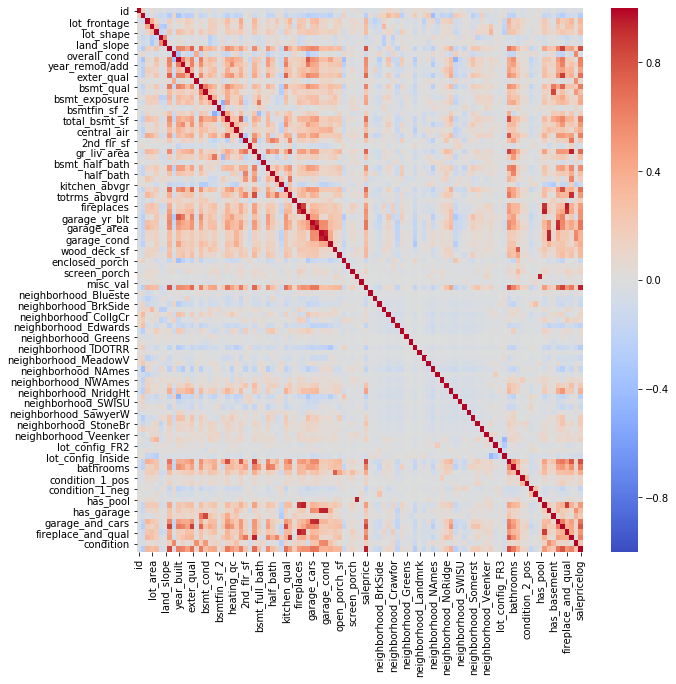

In [201]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            annot=False, vmin=-1, cmap="coolwarm");

> ***Oh god. So this is a lot of information to take in but letss focus in on what's DEEP red and examine those correlations later.***

Text(0.5, 1, 'Saleprice Correlation Heatmap')

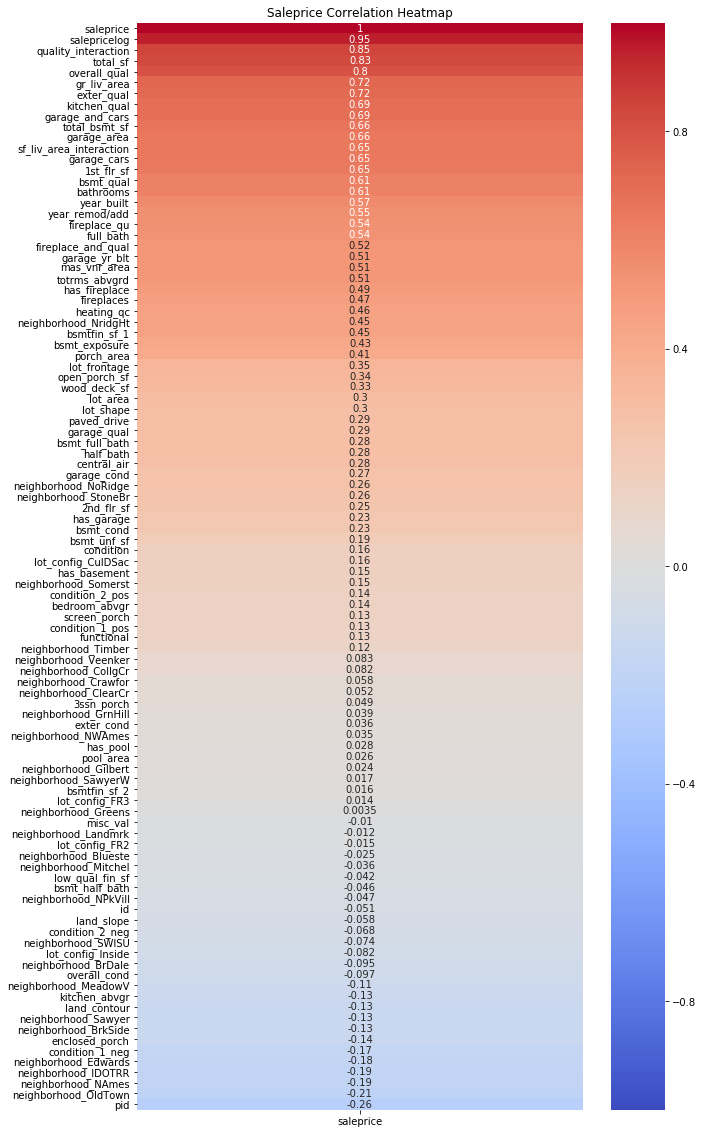

In [200]:
plt.figure(figsize=(10,20))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1);
plt.title('Saleprice Correlation Heatmap')

> ***As expected, some of these neighborhood values have pretty strong correlations so I'm glad I dummied them. 'lot_config' isn't as impressive as I had hoped it would be. It does look like we have some strong correlations that  will help our regression model significantly.*** 

<Figure size 1080x1080 with 0 Axes>

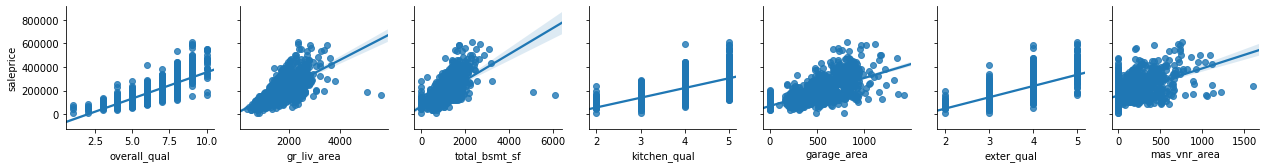

In [67]:
plt.figure(figsize = (15, 15))
sns.pairplot(df, x_vars = ['overall_qual', 'gr_liv_area', 'total_bsmt_sf', 
                           'kitchen_qual', 'garage_area', 'exter_qual', 'mas_vnr_area'], 
             y_vars = 'saleprice', kind='reg');

> ***Here are some plots demonstrating some of our strongest positive correlations with 'saleprice'***

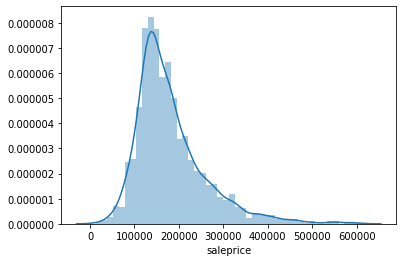

In [68]:
sns.distplot(df['saleprice']);

> ***Putting this Distplot here to simply show the range of our 'SalePrice' values. It looks like the regression model I develop will likely have most of its predictions between 100,000 and 300,000 if it is accurate. I could potentially try and remove some outliers at some point if the right skew is affecting my model accuracy. I could also try .log on this data. Let's actually try that now...***

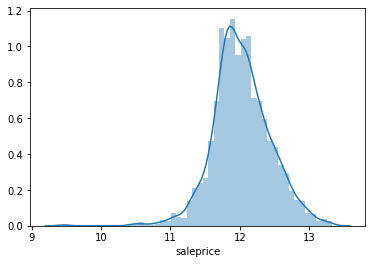

In [205]:
sns.distplot(np.log(df['saleprice']));

> ***Interesting! So these results are definitely approaching a normal distribution moreso than its unlogged counterpart. I'll have to try modelling with this***

Text(0.5, 1.0, 'Ground Living Area (SF) and Saleprice')

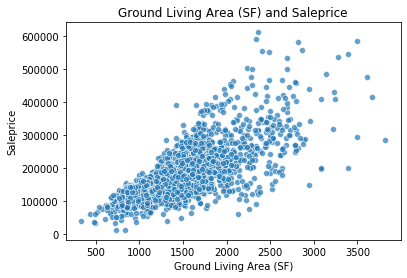

In [209]:
#gr_liv_area is the numerical value with the highest correlation to saleprice so I thought isolating the scatterplot
#would be helpful here. There are some outliers present when gr_liv_area > 4500 that might be helpful to remove
sns.scatterplot('gr_liv_area', 'saleprice', data = df, alpha= 0.7)
plt.xlabel('Ground Living Area (SF)')
plt.ylabel('Saleprice')
plt.title ('Ground Living Area (SF) and Saleprice')

Text(0.5, 1.0, 'Garage Area and Saleprice')

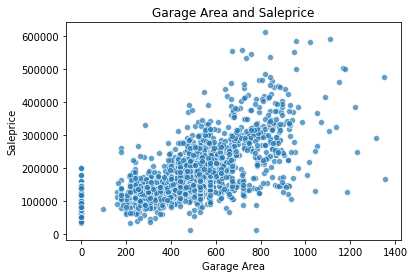

In [211]:
sns.scatterplot('garage_area', 'saleprice', data = df, alpha = 0.7)
plt.xlabel('Garage Area')
plt.ylabel('Saleprice')
plt.title('Garage Area and Saleprice')

Text(0, 0.5, 'Saleprice')

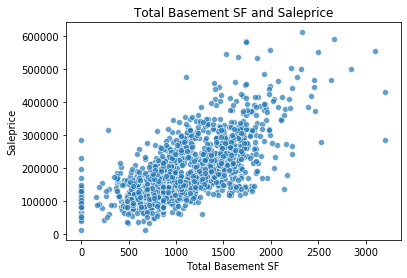

In [212]:
sns.scatterplot('total_bsmt_sf','saleprice', data = df, alpha = 0.7)
plt.title('Total Basement SF and Saleprice')
plt.xlabel('Total Basement SF')
plt.ylabel('Saleprice')

Text(0, 0.5, 'Saleprice')

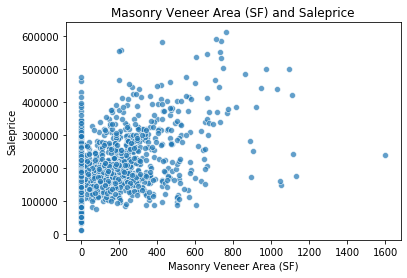

In [213]:
#All these 0 values make me really dubious about using this column in my feature list
sns.scatterplot('mas_vnr_area', 'saleprice', data= df, alpha = 0.7)
plt.title('Masonry Veneer Area (SF) and Saleprice')
plt.xlabel('Masonry Veneer Area (SF)')
plt.ylabel('Saleprice')

In [73]:
#Dropping thouse outliers
df[df['gr_liv_area'] > 4500]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside
960,1499,908154235,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Gtl,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,PConc,5.0,3.0,4.0,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,5,1,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,7,3,4.0,Attchd,2008.0,Fin,2.0,1418.0,3.0,3.0,Y,214,292,0,0,0,480,0,1,2008,New,160000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1885,2181,908154195,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Gtl,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,5,3,PConc,5.0,3.0,4.0,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,5,1,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,5,15,7,2,4.0,Attchd,2008.0,Fin,3.0,1154.0,3.0,3.0,Y,546,484,0,0,0,0,17000,10,2007,New,183850,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [74]:
df[df['mas_vnr_area'] > 1400]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside
1409,1850,533241030,60,FV,66.0,7399,Pave,IR1,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,4,3,PConc,4.0,3.0,1.0,BLQ,649.0,Unf,0.0,326.0,975.0,GasA,5,1,SBrkr,975,975,0,1950,0.0,0.0,2,1,3,1,4,7,7,1,3.0,Detchd,1997.0,RFn,2.0,576.0,3.0,3.0,Y,0,10,0,0,198,0,0,6,2007,WD,239000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [75]:
df = df.drop(df[df['id'] == 1499].index)
df = df.drop(df[df['id'] == 2181].index)

# Model Creation: Attempt 1

In [76]:
#Let's define some regression metric functions to make our lives easier 
#as we go through the modelling process

def allthemetrics(y, ypred):
    residuals = y - ypred
    MAE = metrics.mean_absolute_error(y, ypred)
    RSS = (residuals ** 2).sum()
    MSE = metrics.mean_squared_error(y, ypred)
    RMSE = np.sqrt(RSS / len(ypred))
    R2 = metrics.r2_score(y, ypred)
    print(f"MAE is {MAE}, RSS is {RSS}, MSE is {MSE}, RMSE is {RMSE}, R^2 is {R2}.")

In [77]:
#Lets instantiate our regression models
lasso = LassoCV(cv=5)
ridge = RidgeCV()
lr = LinearRegression()

In [78]:
#For now, let's try for an overfit model using all of my numeric features in my df except
#for 'saleprice'
#This code influenced by code Riley used in lesson 3.07
exclude2 = ['saleprice', 'id', 'pid', 'garage_cars', '1st_flr_sf',
           'fireplace_qu', 'year_built', 'garage_yr_blt', 'yr_sold', 'mo_sold',
           'misc_val', 'pool_area', 'screen_porch', '3ssn_porch', 'enclosed_porch',
           'kitchen_abvgr']
features2 = [x for x in df._get_numeric_data().columns if x not in exclude2]

In [79]:
#For model-1
#Train test split coming in hot!
X_feat2 = df[features2]
y = df['saleprice']
Xkaggle2 = test[features2]
X_feat2_train, X_feat2_test, y_feat2_train, y_feat2_test = train_test_split(X_feat2, y, random_state=42)

In [80]:
print(f'X_feat2_train shape is: {X_feat2_train.shape}')
print(f'y_feat2_train shape is: {y_feat2_train.shape}')
print(f'X_feat2_test shape is: {X_feat2_test.shape}')
print(f'y_feat2_test shape is: {y_feat2_test.shape}')

X_feat2_train shape is: (1536, 65)
y_feat2_train shape is: (1536,)
X_feat2_test shape is: (513, 65)
y_feat2_test shape is: (513,)


In [81]:
#Here comes our scaler!
ss = StandardScaler()
ss.fit(X_feat2_train)
X_train2_sc = ss.transform(X_feat2_train)
X_test2_sc= ss.transform(X_feat2_test)
Xkaggle2_sc = ss.transform(Xkaggle2)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [82]:
#Fitting the two models we'll be using
lasso.fit(X_train2_sc, y_feat2_train);
ridge.fit(X_train2_sc, y_feat2_train);

In [83]:
#Here's our Ridge cross-validation score! It's not too bad.
cross_val_score(ridge, X_train2_sc, y_feat2_train, cv= 5).mean()

0.8858720582724979

In [84]:
ridge.score(X_train2_sc, y_feat2_train)

0.9015805541725037

In [85]:
ridge.score(X_test2_sc, y_feat2_test)

0.9038451852688784

In [86]:
#And here's our Lasso cross-validation score! It's a little better then Ridge so I'll probably be going with lasso
#model fitting as we move forward.
cross_val_score(lasso, X_train2_sc, y_feat2_train, cv= 5).mean()

0.886071152195376

In [87]:
lasso.score(X_train2_sc, y_feat2_train)

0.9008831831617179

In [88]:
lasso.score(X_test2_sc, y_feat2_test)

0.9048993706316191

In [89]:
#Creating Kaggle predictions
preds2 = lasso.predict(Xkaggle2_sc)

In [90]:
#Creating X_train and X_test predictions
preds2train = lasso.predict(X_train2_sc)
preds2test = lasso.predict(X_test2_sc)

In [91]:

allthemetrics(y_feat2_train, preds2train)

MAE is 17093.18520166723, RSS is 954916692196.1133, MSE is 621690554.8151779, RMSE is 24933.723244136203, R^2 is 0.9008831831617179.


In [92]:
allthemetrics(y_feat2_test, preds2test)

MAE is 17751.92923474704, RSS is 308434618840.98914, MSE is 601237073.7641114, RMSE is 24520.136087797542, R^2 is 0.9048993706316191.


| Model 1 Metric Scores | MAE       | RSS              | MSE           | RMSE      | R2    |
|-----------------------|-----------|------------------|---------------|-----------|-------|
| Train                 | 17093.185 | 954916692196.113 | 621690554.815 | 24933.723 | 0.901 |
| Test                  | 17751.929 | 308434618840.989 | 601237073.764 | 24520.136 | 0.905 |

> ***Lets create our first actually modelled submission***

In [93]:
test.shape

(879, 105)

In [94]:
test['preds'] = preds2

In [95]:
sub = pd.DataFrame({'Id': test['id'], 'SalePrice': test['preds']})

In [96]:
sub.shape

(879, 2)

In [97]:
sub.to_csv('./datasets/Kaggle Submissions/submission.csv', index = False)

# Feature Engineering Part 2: Electric Boogaloo

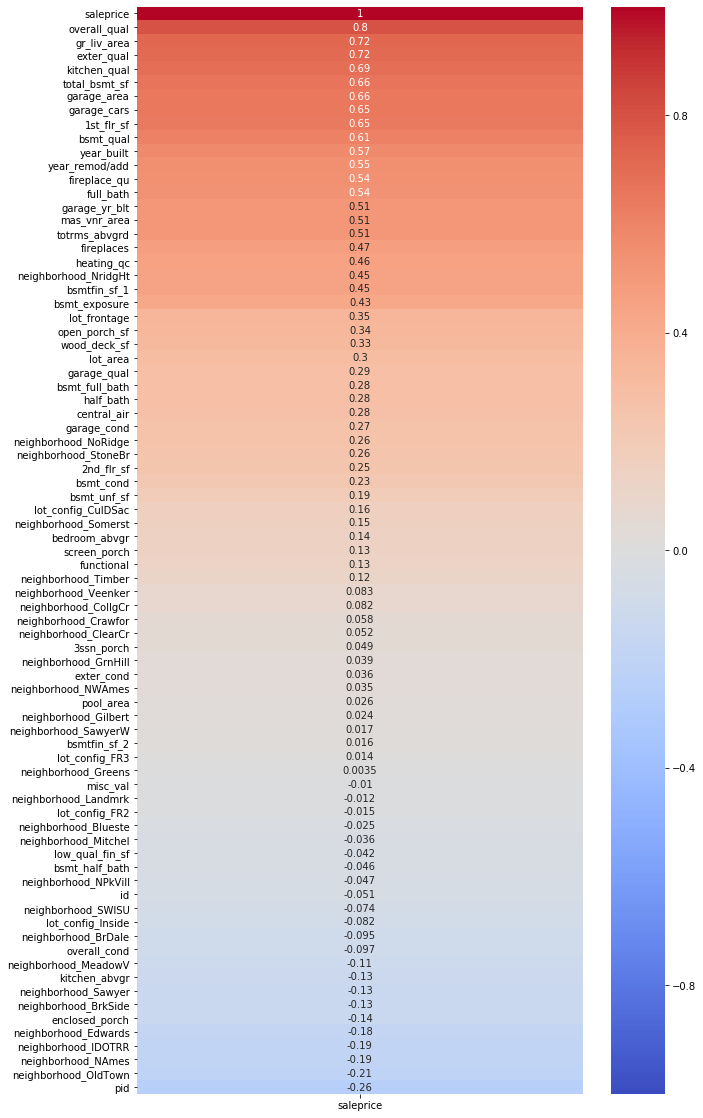

In [98]:
#Let's take a look at our heatmap again. Can I do some feature engineering to create new columns with 
# a higher correlation with SalePrice?
plt.figure(figsize=(10,20))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1);

In [99]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside
0,109,533352170,60,RL,72.774648,13517,Pave,IR1,Lvl,AllPub,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,5,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0.0,Attchd,1976.0,RFn,2.0,475.0,3.0,3.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,544,531379050,60,RL,43.000000,11492,Pave,IR1,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,1.0,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,5,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3.0,Attchd,1997.0,RFn,2.0,559.0,3.0,3.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,153,535304180,20,RL,68.000000,7922,Pave,Reg,Lvl,AllPub,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,1.0,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,3,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0.0,Detchd,1953.0,Unf,1.0,246.0,3.0,3.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,Unf,0.0,Unf,0.0,384.0,384.0,GasA,4,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0.0,BuiltIn,2007.0,Fin,2.0,400.0,3.0,3.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,255,906425045,50,RL,82.000000,14235,Pave,IR1,Lvl,AllPub,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,1.0,Unf,0.0,Unf,0.0,676.0,676.0,GasA,3,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0.0,Detchd,1957.0,Unf,2.0,484.0,3.0,3.0,N,0,59,0,0,0,0,0,3,2010,WD,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [100]:
#Let's check for correlation between some of our features to see if we can create interaction terms that 
#could potentially improve our model accuracy
df.corr()['1st_flr_sf'].sort_values(ascending = False).head()

1st_flr_sf       1.000000
total_bsmt_sf    0.790623
saleprice        0.648252
gr_liv_area      0.530279
garage_area      0.489421
Name: 1st_flr_sf, dtype: float64

In [101]:
df.corr()['overall_qual'].sort_values(ascending = False).head(7)

overall_qual    1.000000
saleprice       0.803462
exter_qual      0.738370
kitchen_qual    0.688878
bsmt_qual       0.652878
year_built      0.602376
garage_cars     0.587206
Name: overall_qual, dtype: float64

In [102]:
df.corr()['garage_area'].sort_values(ascending = False).head()

garage_area     1.000000
garage_cars     0.897042
saleprice       0.655452
garage_qual     0.560015
overall_qual    0.559708
Name: garage_area, dtype: float64

In [103]:
df.corr()['fireplace_qu'].sort_values(ascending = False).head()

fireplace_qu    1.000000
fireplaces      0.860785
saleprice       0.539484
gr_liv_area     0.480848
overall_qual    0.479610
Name: fireplace_qu, dtype: float64

In [104]:
df.corr()['gr_liv_area'].sort_values(ascending = False).head()

gr_liv_area      1.000000
totrms_abvgrd    0.812129
saleprice        0.719463
2nd_flr_sf       0.655866
full_bath        0.630462
Name: gr_liv_area, dtype: float64

In [105]:
df.corr()['pool_area'].sort_values(ascending = False).head()

pool_area               1.000000
wood_deck_sf            0.128204
neighborhood_Veenker    0.113155
fireplaces              0.088472
1st_flr_sf              0.082143
Name: pool_area, dtype: float64

In [106]:
df.corr()['exter_cond'].sort_values(ascending = False)[:5]

exter_cond              1.000000
overall_cond            0.412300
bsmt_cond               0.145163
central_air             0.119499
neighborhood_OldTown    0.116083
Name: exter_cond, dtype: float64

In [107]:
df.corr()['2nd_flr_sf'].sort_values(ascending = False)[:5]

2nd_flr_sf       1.000000
gr_liv_area      0.655866
half_bath        0.615119
totrms_abvgrd    0.581356
bedroom_abvgr    0.503342
Name: 2nd_flr_sf, dtype: float64

In [108]:
# I'm conflicted as to whether or not I should create interaction terms for certain '_sf' features 
# OR I should a single SF feature where I add all the '_sf' features together, for now lets try that one.
df['total_sf'] = df['1st_flr_sf'] + df['2nd_flr_sf'] + df['total_bsmt_sf']
test['total_sf'] = test['1st_flr_sf'] + test['2nd_flr_sf'] + test['total_bsmt_sf']



# Below this line are some interaction terms I created that I've shelved for the time being
#df['bsmt_1st_sf'] = df['1st_flr_sf'] * df['total_bsmt_sf']
# test['bsmt_1st_sf'] = test['1st_flr_sf'] * test['total_bsmt_sf']

In [109]:
# I have the same thoughts with bathrooms, in the data dictionary bathrooms are defined as such. 
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade
# So theoretically I could just create a total bathrooms column and clean up my features list. We'll try that as well.
df[['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath']].head()

,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath
0,0.0,0.0,2,1
1,1.0,0.0,2,1
2,1.0,0.0,1,0
3,0.0,0.0,2,1
4,0.0,0.0,2,0


In [110]:
df['bathrooms'] = df['bsmt_full_bath'] + df['bsmt_half_bath'] + df['full_bath'] + df['half_bath']
test['bathrooms'] = test['bsmt_full_bath'] + test['bsmt_half_bath'] + test['full_bath'] + test['half_bath']

In [111]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,total_sf,bathrooms
0,109,533352170,60,RL,72.774648,13517,Pave,IR1,Lvl,AllPub,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,5,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0.0,Attchd,1976.0,RFn,2.0,475.0,3.0,3.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2204.0,3.0
1,544,531379050,60,RL,43.000000,11492,Pave,IR1,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,1.0,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,5,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3.0,Attchd,1997.0,RFn,2.0,559.0,3.0,3.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3035.0,4.0
2,153,535304180,20,RL,68.000000,7922,Pave,Reg,Lvl,AllPub,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,1.0,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,3,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0.0,Detchd,1953.0,Unf,1.0,246.0,3.0,3.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2114.0,2.0
3,318,916386060,60,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,Unf,0.0,Unf,0.0,384.0,384.0,GasA,4,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0.0,BuiltIn,2007.0,Fin,2.0,400.0,3.0,3.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1828.0,3.0
4,255,906425045,50,RL,82.000000,14235,Pave,IR1,Lvl,AllPub,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,1.0,Unf,0.0,Unf,0.0,676.0,676.0,GasA,3,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0.0,Detchd,1957.0,Unf,2.0,484.0,3.0,3.0,N,0,59,0,0,0,0,0,3,2010,WD,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2121.0,2.0


In [112]:
# I'm just going to keep going through the data dictionary to see what I can potentially combine. I have a bunch
# of 'porch' columns, and here's how they are defined in the data dictionary
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# They are all in square feet so I'm going t try and make a porch_footage column combining all those
df[['wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch']].head()

,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch
0,0,44,0,0,0
1,0,74,0,0,0
2,0,52,0,0,0
3,100,0,0,0,0
4,0,59,0,0,0


In [113]:
df['porch_area'] = df['wood_deck_sf'] + df['open_porch_sf'] + df['enclosed_porch'] + df['3ssn_porch'] + df['screen_porch']
test['porch_area'] = test['wood_deck_sf'] + test['open_porch_sf'] + test['enclosed_porch'] + test['3ssn_porch'] + test['screen_porch']

In [114]:
#Very curious if I could create useful features out of some of my remaining object dtypes... worth a try.
#At least for the ones with some sort of numerical hierarchy with rankings
df.dtypes[:5]

id                int64
pid               int64
ms_subclass      object
ms_zoning        object
lot_frontage    float64
dtype: object

In [115]:
df['lot_shape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [116]:
#I'm using the data dictionary on kaggle to organize these numbers
df['lot_shape'].replace({
    'Reg':1, 
    'IR1':2, 
    'IR2':3,
    'IR3':4
}, inplace=True)

test['lot_shape'].replace({
    'Reg':1, 
    'IR1':2, 
    'IR2':3,
    'IR3':4
}, inplace=True)



In [117]:
df['land_contour'].unique()

array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [118]:
df['land_contour'].replace({
    'Low':1, 
    'HLS':2, 
    'Bnk':3,
    'Lvl':4
}, inplace=True)

test['land_contour'].replace({
    'Low':1, 
    'HLS':2, 
    'Bnk':3,
    'Lvl':4
}, inplace=True)


In [119]:
df['utilities'].unique()

array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object)

In [120]:
df['utilities'].replace({
    'ELO':1, 
    'NoSewa':2, 
    'NoSewr':3,
    'AllPub':4
}, inplace=True)

test['utilities'].replace({
    'ELO':1, 
    'NoSewa':2, 
    'NoSewr':3,
    'AllPub':4
}, inplace=True)


In [121]:
#Looks like my earlier .replace() changed some of these values but not all.
#I made mod=4 and sev=1 before when I was mass replacing. Let's fix these and put them in the 
#order of the data dictionary
df['land_slope'].unique()

array(['Gtl', 1, 4], dtype=object)

In [122]:
df['land_slope'].replace({
    '1':1, 
    4:2, 
    'Gtl':3,
}, inplace=True)

test['land_slope'].replace({
    '1':1, 
    4:2, 
    'Gtl':3,
}, inplace=True)


In [123]:
df['paved_drive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [124]:
df['paved_drive'].replace({
    'N':1, 
    'P':2, 
    'Y':3,
}, inplace=True)

test['paved_drive'].replace({
    'N':1, 
    'P':2, 
    'Y':3,
}, inplace=True)

In [125]:
#I think I've now made every column that can plausibly be made numerical numeric. Here's hoping
#this improves score.
df.dtypes.head()

id                int64
pid               int64
ms_subclass      object
ms_zoning        object
lot_frontage    float64
dtype: object

In [126]:
df['land_slope'].value_counts()

3    1951
2      88
1      10
Name: land_slope, dtype: int64

In [127]:
df['condition_1'].unique()

array(['RRAe', 'Norm', 'PosA', 'Artery', 'Feedr', 'PosN', 'RRAn', 'RRNe',
       'RRNn'], dtype=object)

In [128]:
df['condition_2'].unique()

array(['Norm', 'RRNn', 'Feedr', 'Artery', 'PosA', 'PosN', 'RRAe', 'RRAn'],
      dtype=object)

In [129]:
# These condition_1 and condition_2 columns look like they could significantly impact my model score
# if I can create numerical variables out of them. Having a positive feature very likely positively correlates
# with saleprice and having a negative feature very likely negatively correlates with it
df['condition_1'].value_counts()

Norm      1766
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [130]:
df['condition_2'].value_counts()

Norm      2023
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: condition_2, dtype: int64

In [131]:
#Creating new columns to hopefully use as features denoting whether or not the house has a positive feature or neg feature
df['condition_1_pos'] = df['condition_1'].map(lambda binarize: 1 if (binarize=='PosA') | (binarize=='PosN') else 0)
test['condition_1_pos'] = test['condition_1'].map(lambda binarize: 1 if (binarize=='PosA') | (binarize=='PosN') else 0)

In [132]:
df['condition_2_pos'] = df['condition_2'].map(lambda binarize: 1 if (binarize=='PosA') | (binarize=='PosN') else 0)
test['condition_2_pos'] = test['condition_2'].map(lambda binarize: 1 if (binarize=='PosA') | (binarize=='PosN') else 0)

In [133]:
df['condition_1_neg'] = df['condition_1'].map(lambda binarize: 1 if (binarize=='Feedr') | (binarize=='Artery') | 
                      (binarize== 'RRNn') | (binarize== 'RRAe') | (binarize=='RRAn') else 0)
test['condition_1_neg'] = test['condition_1'].map(lambda binarize: 1 if (binarize=='Feedr') | (binarize=='Artery') | 
                      (binarize== 'RRNn') | (binarize== 'RRAe') | (binarize=='RRAn') else 0)

In [134]:
df['condition_2_neg'] = df['condition_2'].map(lambda binarize: 1 if (binarize=='Feedr') | (binarize=='Artery') | 
                      (binarize== 'RRNn') | (binarize== 'RRAe') | (binarize=='RRAn') else 0)
test['condition_2_neg'] = test['condition_2'].map(lambda binarize: 1 if (binarize=='Feedr') | (binarize=='Artery') | 
                      (binarize== 'RRNn') | (binarize== 'RRAe') | (binarize=='RRAn') else 0)

In [135]:
#I'm also curious if house type plays a role at all in modelling, we'll try hot encoding that column as well
df['house_style'].value_counts()

1Story    1058
2Story     597
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

In [136]:
# Rather then overfit my model I'm leaving these out, but leaving this code out commented for future use
# if I come back to this project later and also to show my thought process.

# df = pd.get_dummies(df, columns = ['house_style'], drop_first = True)
# test = pd.get_dummies(test, columns = ['house_style'], drop_first = True)

In [137]:
#Creating dummies out of 'bldg_type' could be overkill and negatively impact our model but let's give it a try!
df['bldg_type'].value_counts()

1Fam      1698
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: bldg_type, dtype: int64

In [138]:
# Rather then overfit my model I'm leaving these out, but leaving this code out commented for future use
# if I come back to this project later and also to show my thought process.

# df = pd.get_dummies(df, columns = ['bldg_type'], drop_first = True)
# test = pd.get_dummies(test, columns = ['bldg_type'], drop_first = True)

In [139]:
# More dummies! Let's also do bsmt_fin_type. A finished and livable basement should theoretically add a lot of 
# value to a house.
df['bsmtfin_type_1'].value_counts()

GLQ    613
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [140]:
# Rather then overfit my model I'm leaving these out, but leaving this code out commented for future use
# if I come back to this project later and also to show my thought process.

# df['basement_functional'] = df['bsmtfin_type_1'].map(lambda binarize: 1 if (binarize=='GLQ') | (binarize=='ALQ') | 
#                       (binarize== 'BLQ') | (binarize=='Rec') else 0)
# test['basement_functional'] = test['bsmtfin_type_1'].map(lambda binarize: 1 if (binarize=='GLQ') | (binarize=='ALQ') | 
#                       (binarize== 'BLQ') | (binarize=='Rec') else 0)

In [141]:
#For now I'm not going to touch 'bsmtfin_type_2' because even after looking at the data dictionary what it means
#has me a bit confused.
df['bsmtfin_type_2'].value_counts()

Unf    1747
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [142]:
# Rather then overfit my model I'm leaving these out, but leaving this code out commented for future use
# if I come back to this project later and also to show my thought process.

# df = pd.get_dummies(df, columns = ['bsmtfin_type_1'], drop_first = True)
# test = pd.get_dummies(test, columns = ['bsmtfin_type_1'], drop_first = True)

In [143]:
# If a house has a pool I'm sure it must be worth more. Sadly there are practically no pools in Ames Iowa, 
# so I don't think this feature will be helpful at all. I'll include it for best practice and check the correlation,
#though
#Here's the function I made to expedite this process
def binarizedummy(dataframe, newcolumn, oldcolumn):
    dataframe[newcolumn] = dataframe[oldcolumn].map(lambda x: 1 if x > 0 else 0)


In [144]:
# I'm going to create a few more 'has' features here just to see how they correlate with 'saleprice' and decide whether
# or not it's smart to use them in my model.
binarizedummy(df, 'has_pool', 'pool_area')
binarizedummy(test, 'has_pool', 'pool_area')

binarizedummy(df, 'has_fireplace', 'fireplaces')
binarizedummy(test, 'has_fireplace', 'fireplaces')

binarizedummy(df, 'has_garage', 'garage_area')
binarizedummy(test, 'has_garage', 'garage_area')

binarizedummy(df, 'has_basement', 'total_bsmt_sf')
binarizedummy(test, 'has_basement', 'total_bsmt_sf')


In [145]:
#let's make some interaction terms

df['garage_and_cars'] = df['garage_area'] * df['garage_cars'] * df['has_garage']
test['garage_and_cars'] = test['garage_area'] * test['garage_cars']

df['quality_interaction'] = df['overall_qual'] * df['exter_qual'] * df['kitchen_qual'] * df['bsmt_qual']
test['quality_interaction'] = test['overall_qual'] * test['exter_qual'] * test['kitchen_qual'] * test['bsmt_qual']

df['fireplace_and_qual'] = df['fireplace_qu'] * df['fireplaces'] * df['has_fireplace']
test['fireplace_and_qual'] = test['fireplace_qu'] * test['fireplaces'] * df['has_fireplace']

df['sf_liv_area_interaction'] = df['gr_liv_area'] * df['totrms_abvgrd']
test['sf_liv_area_interaction'] = test['gr_liv_area'] * test['totrms_abvgrd']

df['condition'] = df['exter_cond'] * df['overall_cond'] * df['bsmt_cond'] * df['garage_cond']
test['condition'] = test['exter_cond'] * test['overall_cond'] * test['bsmt_cond'] * test['garage_cond']

In [146]:
df.corr()['total_bsmt_sf'].sort_values(ascending = False)[:5]

total_bsmt_sf          1.000000
total_sf               0.818563
1st_flr_sf             0.790623
saleprice              0.664632
quality_interaction    0.588954
Name: total_bsmt_sf, dtype: float64

In [147]:
df.corr()['exter_cond'].sort_values(ascending=False)[:5]

exter_cond      1.000000
condition       0.553006
overall_cond    0.412300
bsmt_cond       0.145163
central_air     0.119499
Name: exter_cond, dtype: float64

In [148]:
#paved_drive and lot_shape may be worth modelling 
df.corr()['saleprice'].sort_values(ascending = False)[:5]

saleprice              1.000000
quality_interaction    0.846015
total_sf               0.829896
overall_qual           0.803462
gr_liv_area            0.719463
Name: saleprice, dtype: float64

# Model Attempt 2

In [149]:
#sadly most of my newly made .replace() object to ints/floats did not help my model score so I've put them in the
#exclude list save for 'lot_shape' which I've included in my features because not only does it make logical sense
#for it to be there (in my research lot size and shape always impacted price significantly),
#I'm going to keep them as they are because despite the lack of results I got from them, I still think
#converting them to functional ints/floats was best practice.

exclude3 = ['id', 'pid', 'salepricelog', 'saleprice', 'land_slope',
            '1st_flr_sf', 'utilities', 'land_contour', 'paved_drive',
            '2nd_flr_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath',             
            'full_bath', 'half_bath', 'wood_deck_sf', 'open_porch_sf', 
            'enclosed_porch', '3ssn_porch','screen_porch', 'has_pool', 
            'has_garage', 'has_basement', 'condition', 'low_qual_fin_sf',
            'bsmt_unf_sf', 'pool_area']
    
           

features3 = [x for x in df._get_numeric_data().columns if x not in exclude3]


In [150]:
df[features3].head()

,lot_frontage,lot_area,lot_shape,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_sf_2,heating_qc,central_air,gr_liv_area,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,misc_val,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,total_sf,bathrooms,porch_area,condition_1_pos,condition_2_pos,condition_1_neg,condition_2_neg,has_fireplace,garage_and_cars,quality_interaction,fireplace_and_qual,sf_liv_area_interaction
0,72.774648,13517,2,6,8,1976,2005,289.0,4,3,3.0,3.0,1.0,533.0,0.0,5,1,1479,3,1,4,6,7,0,0.0,1976.0,2.0,475.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2204.0,3.0,44,0,0,1,0,0,950.0,288.0,0.0,8874
1,43.000000,11492,2,7,5,1996,1997,132.0,4,3,4.0,3.0,1.0,637.0,0.0,5,1,2122,4,1,4,8,7,1,3.0,1997.0,2.0,559.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3035.0,4.0,74,0,0,0,0,1,1118.0,448.0,3.0,16976
2,68.000000,7922,1,5,7,1953,2007,0.0,3,4,3.0,3.0,1.0,731.0,0.0,3,1,1057,3,1,4,5,7,0,0.0,1953.0,1.0,246.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2114.0,2.0,52,0,0,0,0,0,246.0,180.0,0.0,5285
3,73.000000,9802,1,5,5,2006,2007,0.0,3,3,4.0,3.0,1.0,0.0,0.0,4,1,1444,3,1,3,7,7,0,0.0,2007.0,2.0,400.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1828.0,3.0,100,0,0,0,0,0,800.0,180.0,0.0,10108
4,82.000000,14235,2,6,8,1900,1993,0.0,3,3,2.0,4.0,1.0,0.0,0.0,3,1,1445,3,1,3,6,7,0,0.0,1957.0,2.0,484.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2121.0,2.0,59,0,0,0,0,0,968.0,108.0,0.0,8670


In [151]:
features3[:5]

['lot_frontage', 'lot_area', 'lot_shape', 'overall_qual', 'overall_cond']

In [152]:
X_feat3 = df[features3]
y = df['saleprice']
Xkaggle3 = test[features3]
X_feat3_train, X_feat3_test, y_feat3_train, y_feat3_test = train_test_split(X_feat3, y, random_state=42)

In [153]:
#Scaling again
ss3 = StandardScaler()
ss3.fit(X_feat3_train)
X_train3_sc = ss3.transform(X_feat3_train)
X_test3_sc= ss3.transform(X_feat3_test)
Xkaggle3_sc = ss3.transform(Xkaggle3)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [154]:
lasso3 = LassoCV(cv = 5)

In [155]:
lasso3.fit(X_train3_sc, y_feat3_train);

In [156]:
cross_val_score(lasso3, X_train3_sc, y_feat3_train, cv= 5).mean()

0.9141810319545032

In [157]:
cross_val_score(lasso3, X_test3_sc, y_feat3_test).mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9088451993990541

In [158]:
lasso3.score(X_train3_sc, y_feat3_train)

0.9270982061343076

In [159]:
lasso3.score(X_test3_sc, y_feat3_test)

0.928199935867342

In [160]:
preds3 = lasso3.predict(Xkaggle3_sc)
preds3[:5]

array([142050.18193076, 162728.38837014, 205154.58850832, 103943.08611684,
       161505.92442759])

In [161]:
test['preds'] = preds3

In [162]:
#Creating these variables so I can get my regression metric scores
preds3train = lasso3.predict(X_train3_sc)
preds3test = lasso3.predict(X_test3_sc)

In [163]:
allthemetrics(y_feat3_train, preds3train)

MAE is 14269.345629024521, RSS is 702354474992.6062, MSE is 457262027.989978, RMSE is 21383.686024396684, R^2 is 0.9270982061343076.


In [164]:
allthemetrics(y_feat3_test, preds3test)

MAE is 14907.397158211032, RSS is 232865182497.70862, MSE is 453928230.9896854, RMSE is 21305.591542824746, R^2 is 0.928199935867342.


| Model 2 Metric Scores | MAE       | RSS              | MSE           | RMSE      | R2    |
|-----------------------|-----------|------------------|---------------|-----------|-------|
| Train                 | 14269.346 | 702354474992.606 | 457262027.990 | 21383.686 | 0.927 |
| Test                  | 14907.397 | 232865182497.709 | 453928230.990 | 21305.592 | 0.928 |

> - ***Creating the 2nd Kaggle submission***

In [165]:
sub = pd.DataFrame({'Id': test['id'], 'SalePrice': test['preds']})

In [166]:
sub.head()

,Id,SalePrice
0,2658,142050.181931
1,2718,162728.388370
2,2414,205154.588508
3,1989,103943.086117
4,625,161505.924428


In [167]:
sub.to_csv('./datasets/Kaggle Submissions/submission2.csv', index = False)

## Model Attempt 3

In [168]:
#I'm already pretty happy with my model 2 scores. The score between train and test sets is extremely close
#So the only thing I can really think to do now is account for the right skew in my y variable.
#'saleprice' can potentially be normalized by calling .log on it, which could allow for
# Outliers to have less of an impact on prediction numbers so lets try that.
df['salepricelog'] = df['saleprice'].map(np.log)

In [169]:
ylog = df['salepricelog']
Xkaggle4 = test[features3]

In [170]:
X_feat4_train, X_feat4_test, y_feat4_train, y_feat4_test = train_test_split(X_feat3, ylog, random_state=42)

In [171]:
ss4 = StandardScaler()
ss4.fit(X_feat3_train)
X_train4_sc = ss4.transform(X_feat4_train)
X_test4_sc= ss4.transform(X_feat4_test)
Xkaggle4_sc = ss4.transform(Xkaggle4)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [172]:
lasso4 = LassoCV(cv = 5)
lasso4.fit(X_train4_sc, y_feat4_train);

In [173]:
cross_val_score(lasso4, X_train4_sc, y_feat4_train, cv= 5).mean()

0.9165469136990121

In [174]:
cross_val_score(lasso4, X_test4_sc, y_feat4_test, cv= 5 ).mean()

0.8860031251492618

In [175]:
lasso4.score(X_train4_sc, y_feat4_train)

0.9267033148482735

In [176]:
lasso4.score(X_test4_sc, y_feat4_test)

0.9003593377983492

In [177]:
#Creating these variables so I can get my regression metric scores
preds4train = lasso4.predict(X_train4_sc)
preds4test = lasso4.predict(X_test4_sc)

In [178]:
allthemetrics(y_feat4_train, preds4train)

MAE is 0.07678096416733791, RSS is 19.0389752691126, MSE is 0.012395166190828517, RMSE is 0.11133358069705886, R^2 is 0.9267033148482735.


In [179]:

allthemetrics(y_feat4_test, preds4test)

MAE is 0.07958182472485502, RSS is 8.674516696502462, MSE is 0.016909389271934624, RMSE is 0.13003610756991546, R^2 is 0.9003593377983492.


| Model 3 Metric Scores | MAE                 | RSS               | MSE                  | RMSE                | R2                 |
|-----------------------|---------------------|-------------------|----------------------|---------------------|--------------------|
| Train                 | 0.07678096416733791 | 19.0389752691126  | 0.012395166190828517 | 0.11133358069705886 | 0.9267033148482735 |
| Test                  | 0.07958182472485502 | 8.674516696502462 | 0.016909389271934624 | 0.13003610756991546 | 0.9003593377983492 |

> - ***Creating 3rd Kaggle Submission***

In [180]:
#Hmm my scores have gone down compared to model 2. I'll still generate these predictions and see what happens,
#but perhaps my initial assumption was wrong here.
preds4 = lasso4.predict(Xkaggle4_sc)

In [181]:
#Lets scale these preds back up for our kaggle submission
preds4 = np.exp(preds4)

In [182]:
preds4[:5]

array([126281.91172646, 161845.09850501, 205062.00904432, 106398.59905307,
       160798.2123398 ])

In [183]:
test['preds'] = preds4

In [184]:
sub = pd.DataFrame({'Id': test['id'], 'SalePrice': test['preds']})

In [185]:
sub.head()

,Id,SalePrice
0,2658,126281.911726
1,2718,161845.098505
2,2414,205062.009044
3,1989,106398.599053
4,625,160798.212340


In [186]:
sub.to_csv('./datasets/Kaggle Submissions/submission3.csv', index = False)

# Conclusions

#### With our Model now complete,  we have something that can atleast create predictions for homeprices. The following our the most significant indicators of homeprice in this model
> - Quality-Interaction
> - Total SF 
> - Overall Qual
> - Ground Living Area
> - Exterior Quality
> - Kitchen Quality
> - Garage and Cars 
> - Total Bsmt SF
> - Garage Area
> - Ground Live Area and Total Rooms Aboveground Interaction

#### Afterthoughts
The one thing I'm worried about with all of this modelling I've been doing is that I may be overfitting my model. I scored high in the kaggle competition initially (3rd place) but I do worry that some of my engineered features are not very good.
> - Things I'd like to do in the future: 
>> - Revisit feature engineering: make sure that none of the features I'm creating our harming my model's accuracy rather then improving it
>> - On the other side of the coin -- because lasso regression removes insignificant features, what if I just made tons of features (ensuring that they were independent of one another). Could doing something like polynomial-features help our score?
>> - I'd love to revisit this question using XGboost to see how accurate I can get my predictions with a different model.

##### Prepping Dataframes for Extraction/Analysis

In [187]:
excludeextract = ['id', 'pid', 'salepricelog', 'land_slope', 
           'land_contour', 'utilities', 'paved_drive','1st_flr_sf', 
            '2nd_flr_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath',             
            'full_bath', 'half_bath', 'wood_deck_sf', 'open_porch_sf', 
            'enclosed_porch', '3ssn_porch','screen_porch', 'has_pool', 
            'has_garage', 'has_basement', 'condition', 'low_qual_fin_sf',
            'bsmt_unf_sf', 'pool_area']
features_for_analysis = [x for x in df._get_numeric_data().columns if x not in excludeextract]
df_features = df[features_for_analysis]

In [188]:
#This dataframe includes all the features I used in my final model along with saleprice.
df_features.head()

,lot_frontage,lot_area,lot_shape,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_sf_2,heating_qc,central_air,gr_liv_area,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,misc_val,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,total_sf,bathrooms,porch_area,condition_1_pos,condition_2_pos,condition_1_neg,condition_2_neg,has_fireplace,garage_and_cars,quality_interaction,fireplace_and_qual,sf_liv_area_interaction
0,72.774648,13517,2,6,8,1976,2005,289.0,4,3,3.0,3.0,1.0,533.0,0.0,5,1,1479,3,1,4,6,7,0,0.0,1976.0,2.0,475.0,3.0,3.0,0,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2204.0,3.0,44,0,0,1,0,0,950.0,288.0,0.0,8874
1,43.000000,11492,2,7,5,1996,1997,132.0,4,3,4.0,3.0,1.0,637.0,0.0,5,1,2122,4,1,4,8,7,1,3.0,1997.0,2.0,559.0,3.0,3.0,0,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3035.0,4.0,74,0,0,0,0,1,1118.0,448.0,3.0,16976
2,68.000000,7922,1,5,7,1953,2007,0.0,3,4,3.0,3.0,1.0,731.0,0.0,3,1,1057,3,1,4,5,7,0,0.0,1953.0,1.0,246.0,3.0,3.0,0,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2114.0,2.0,52,0,0,0,0,0,246.0,180.0,0.0,5285
3,73.000000,9802,1,5,5,2006,2007,0.0,3,3,4.0,3.0,1.0,0.0,0.0,4,1,1444,3,1,3,7,7,0,0.0,2007.0,2.0,400.0,3.0,3.0,0,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1828.0,3.0,100,0,0,0,0,0,800.0,180.0,0.0,10108
4,82.000000,14235,2,6,8,1900,1993,0.0,3,3,2.0,4.0,1.0,0.0,0.0,3,1,1445,3,1,3,6,7,0,0.0,1957.0,2.0,484.0,3.0,3.0,0,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2121.0,2.0,59,0,0,0,0,0,968.0,108.0,0.0,8670


In [189]:
#Let's make it prettier
df_features.columns = df_features.columns.str.title().str.replace('_', ' ')

In [190]:
df_features.head()

,Lot Frontage,Lot Area,Lot Shape,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Bsmtfin Sf 1,Bsmtfin Sf 2,Heating Qc,Central Air,Gr Liv Area,Bedroom Abvgr,Kitchen Abvgr,Kitchen Qual,Totrms Abvgrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Misc Val,Saleprice,Neighborhood Blueste,Neighborhood Brdale,Neighborhood Brkside,Neighborhood Clearcr,Neighborhood Collgcr,Neighborhood Crawfor,Neighborhood Edwards,Neighborhood Gilbert,Neighborhood Greens,Neighborhood Grnhill,Neighborhood Idotrr,Neighborhood Landmrk,Neighborhood Meadowv,Neighborhood Mitchel,Neighborhood Names,Neighborhood Npkvill,Neighborhood Nwames,Neighborhood Noridge,Neighborhood Nridght,Neighborhood Oldtown,Neighborhood Swisu,Neighborhood Sawyer,Neighborhood Sawyerw,Neighborhood Somerst,Neighborhood Stonebr,Neighborhood Timber,Neighborhood Veenker,Lot Config Culdsac,Lot Config Fr2,Lot Config Fr3,Lot Config Inside,Total Sf,Bathrooms,Porch Area,Condition 1 Pos,Condition 2 Pos,Condition 1 Neg,Condition 2 Neg,Has Fireplace,Garage And Cars,Quality Interaction,Fireplace And Qual,Sf Liv Area Interaction
0,72.774648,13517,2,6,8,1976,2005,289.0,4,3,3.0,3.0,1.0,533.0,0.0,5,1,1479,3,1,4,6,7,0,0.0,1976.0,2.0,475.0,3.0,3.0,0,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2204.0,3.0,44,0,0,1,0,0,950.0,288.0,0.0,8874
1,43.000000,11492,2,7,5,1996,1997,132.0,4,3,4.0,3.0,1.0,637.0,0.0,5,1,2122,4,1,4,8,7,1,3.0,1997.0,2.0,559.0,3.0,3.0,0,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3035.0,4.0,74,0,0,0,0,1,1118.0,448.0,3.0,16976
2,68.000000,7922,1,5,7,1953,2007,0.0,3,4,3.0,3.0,1.0,731.0,0.0,3,1,1057,3,1,4,5,7,0,0.0,1953.0,1.0,246.0,3.0,3.0,0,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2114.0,2.0,52,0,0,0,0,0,246.0,180.0,0.0,5285
3,73.000000,9802,1,5,5,2006,2007,0.0,3,3,4.0,3.0,1.0,0.0,0.0,4,1,1444,3,1,3,7,7,0,0.0,2007.0,2.0,400.0,3.0,3.0,0,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1828.0,3.0,100,0,0,0,0,0,800.0,180.0,0.0,10108
4,82.000000,14235,2,6,8,1900,1993,0.0,3,3,2.0,4.0,1.0,0.0,0.0,3,1,1445,3,1,3,6,7,0,0.0,1957.0,2.0,484.0,3.0,3.0,0,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2121.0,2.0,59,0,0,0,0,0,968.0,108.0,0.0,8670


In [192]:
#Here's the cleaned DF that I saved earlier in the notebook, lets tidy it up a little more.
cleanedcsv = pd.read_csv('./datasets/cleanedDF.csv')

In [193]:
cleanedcsv.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,72.774648,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,5,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0.0,Attchd,1976.0,RFn,2.0,475.0,3.0,3.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.000000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,1.0,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,5,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3.0,Attchd,1997.0,RFn,2.0,559.0,3.0,3.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.000000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,1.0,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,3,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0.0,Detchd,1953.0,Unf,1.0,246.0,3.0,3.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,Unf,0.0,Unf,0.0,384.0,384.0,GasA,4,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0.0,BuiltIn,2007.0,Fin,2.0,400.0,3.0,3.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.000000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,1.0,Unf,0.0,Unf,0.0,676.0,676.0,GasA,3,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0.0,Detchd,1957.0,Unf,2.0,484.0,3.0,3.0,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [194]:
cleanedcsv.columns = cleanedcsv.columns.str.title().str.replace('_', ' ')

In [195]:
cleanedcsv.head()

,Id,Pid,Ms Subclass,Ms Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1St,Exterior 2Nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Bsmtfin Type 1,Bsmtfin Sf 1,Bsmtfin Type 2,Bsmtfin Sf 2,Bsmt Unf Sf,Total Bsmt Sf,Heating,Heating Qc,Central Air,Electrical,1St Flr Sf,2Nd Flr Sf,Low Qual Fin Sf,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom Abvgr,Kitchen Abvgr,Kitchen Qual,Totrms Abvgrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck Sf,Open Porch Sf,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Saleprice
0,109,533352170,60,RL,72.774648,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,5,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0.0,Attchd,1976.0,RFn,2.0,475.0,3.0,3.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.000000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,1.0,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,5,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3.0,Attchd,1997.0,RFn,2.0,559.0,3.0,3.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.000000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,1.0,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,3,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0.0,Detchd,1953.0,Unf,1.0,246.0,3.0,3.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,Unf,0.0,Unf,0.0,384.0,384.0,GasA,4,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0.0,BuiltIn,2007.0,Fin,2.0,400.0,3.0,3.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.000000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,1.0,Unf,0.0,Unf,0.0,676.0,676.0,GasA,3,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0.0,Detchd,1957.0,Unf,2.0,484.0,3.0,3.0,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [196]:
cleanedcsv = cleanedcsv.drop(cleanedcsv[cleanedcsv['Id'] == 1499].index)
cleanedcsv = cleanedcsv.drop(cleanedcsv[cleanedcsv['Id'] == 2181].index)

In [197]:
cleanedcsv = cleanedcsv.drop(columns = ['Id', 'Pid'])

In [198]:
#Now lets save them and be done with it!
cleanedcsv.to_csv('./datasets/cleanedDF.csv', index = False)
df_features.to_csv('./datasets/modelDF.csv', index = False)